# Protection of Personal Data of Clients

We need to protect the data of clients of the insurance company "Hot Potop". Develop a method of data transformation that makes it difficult to recover personal information from them. Justify its correctness.

It is necessary to protect the data in such a way that the quality of machine learning models does not deteriorate during the transformation. There is no need to search for the best model.

## Data preprocessing

Import of used libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

Let's open the dataset and save it in a dataframe

In [2]:
df = pd.read_csv('insurance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


And check the duplicates

In [3]:
df.duplicated().sum()

153

The nature of the features (family, salary, and age) indicates that such coincidences are quite real. The goal of this project is to protect the data, so duplicates will not hinder us.

Let's assess the distributions of the features and visualize the data

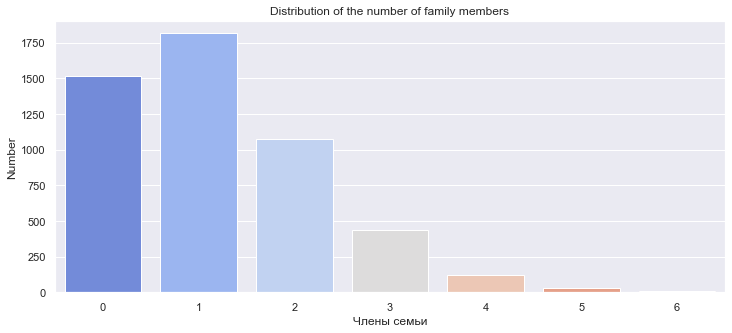

In [4]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(x='Члены семьи', data=df, palette='coolwarm')
ax.set_title('Distribution of the number of family members')
plt.ylabel('Number');

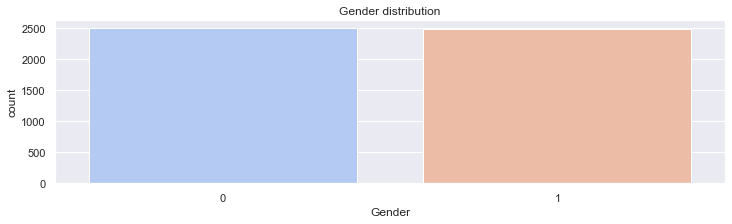

In [5]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.countplot(x='Пол', data=df,  palette='coolwarm')
ax.set_title('Gender distribution')
plt.xlabel('Gender');

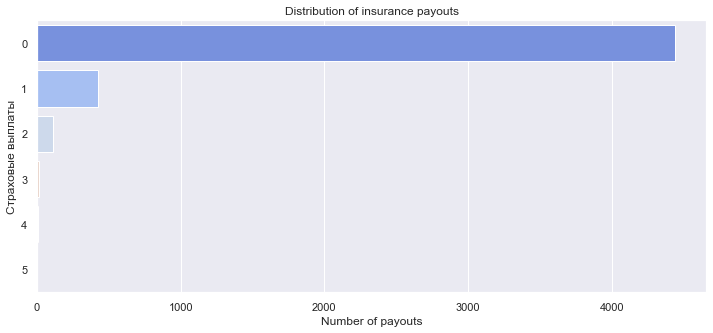

In [6]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.countplot(y='Страховые выплаты', data=df, palette='coolwarm')
ax.set_title('Distribution of insurance payouts')
plt.xlabel('Number of payouts');

/Users/ivanshurgalin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


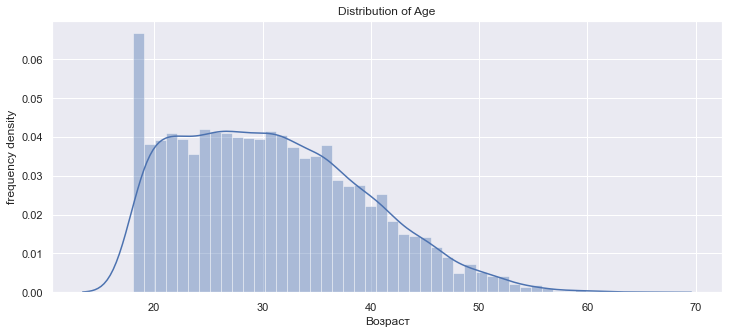

In [7]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Возраст'], bins=len(df['Возраст'].unique()))
ax.set_title('Distribution of Age')
plt.ylabel('frequency density');


/Users/ivanshurgalin/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


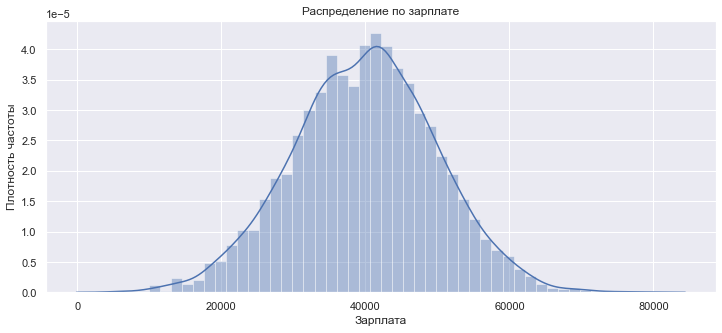

In [8]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Зарплата'])
ax.set_title('Распределение по зарплате')
plt.ylabel('Плотность частоты');


The data has been preprocessed smoothly. It's great, and now we can proceed with data analysis.

## Matrix multiplication

Let's divide the data into features and the target variable

In [9]:
features = df.drop('Страховые выплаты', axis=1)
target = df['Страховые выплаты']

Let's create a LinReg class where we will declare the `fit` and `predict` functions.

In [10]:
class LinReg:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T @ X).dot(X.T).dot(y)
        self.w = w[1:]
        self.w0 = w[0]
        print(w)       
    def predict(self, test_features):
        return  test_features @ self.w + self.w0

Let's create and train the model, and obtain predictions.

In [11]:
model = LinReg()
model.fit(features, target)
predictions = model.predict(features)
r2_score(target, predictions)

[-9.38235504e-01  7.92580543e-03  3.57083050e-02 -1.70080492e-07
 -1.35676623e-02]


0.4249455028666801

Let's create a random square matrix with a size equal to the number of columns in the features, and check its invertibility.

In [12]:
random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
random_matrix
np.linalg.inv(random_matrix)

array([[ 10.19988403,  -2.37620751,  16.90231931,  25.84539906],
       [  0.09558581,   0.20073525,   0.41321945,   1.05921376],
       [ -4.35587114,   1.52165077,  -7.03974523, -10.86134641],
       [  1.77172673,  -0.5562965 ,   3.78187751,   5.1504391 ]])

Will it be possible to obtain the identity matrix?

In [13]:
random_matrix @ np.linalg.inv(random_matrix)

array([[ 1.00000000e+00,  1.11022302e-16, -2.66453526e-15,
        -8.88178420e-16],
       [ 3.33066907e-16,  1.00000000e+00, -4.44089210e-16,
        -8.88178420e-16],
       [-1.33226763e-15,  0.00000000e+00,  1.00000000e+00,
        -1.77635684e-15],
       [-1.11022302e-16,  1.66533454e-16,  8.88178420e-16,
         1.00000000e+00]])

Let's multiply the features by a random invertible matrix.

In [14]:
encoded_features = features.dot(random_matrix)
encoded_features

,0,1,2,3
0,9372.887488,-65587.150830,48253.267016,68211.901322
1,7193.071797,-50247.906575,36995.300816,52254.814680
2,3978.456044,-27769.907252,20452.092062,28876.516661
3,7867.097333,-55135.617744,40540.192912,57353.403850
4,4938.321045,-34515.175639,25404.535108,35890.828623
...,...,...,...,...
4995,6743.914338,-47203.092064,34726.053634,49097.310037
4996,9892.956121,-69286.512569,50958.440729,72067.662334
4997,6398.026969,-44822.188931,32962.441639,46624.222043
4998,6174.391095,-43236.144698,31800.869416,44970.918394


Let's create and train a model on the new features, and obtain predictions.

In [15]:
model = LinReg()
model.fit(encoded_features, target)
predictions = model.predict(encoded_features)
r2_score(target, predictions)


[-0.93823635 -0.35468941 -0.00644608  0.16718319 -0.07570528]


0.4249455026844553

Same metrics.

Predictions are calculated using the formula:


$$
a = Xw
$$

Since the new feature matrix is obtained by multiplying the original $X$ by a random matrix (let's denote it as $M$), the formula takes the form:

$$
a' = X P w
$$

Let's insert the multiplication by an invertible matrix P to prove that: $a' = a$

$$ a'= XP((XP)^T XP)^{-1} (XP)^T y $$

Using the property of transposed matrices: : $$ (AB)^T = A^T B^T $$

$$
a' = XP (P^T X^T XP)^{-1} P^T X^T y
$$

And the property of invertible matrices: $$ (AB)^{-1} = B^{-1} A^{-1} $$

$$ a'= XP(P)^{-1} (X^TX)^{-1} (P^T)^{-1} X^T P^T y $$
Expanding the parentheses: $$ a'= XP(P)^{-1} (X^TX)^{-1} (P^T)^{-1} X^T P^T y $$

Multiplication $$PP^{-1} = E$$

Multiplication by the identity matrix does not change the original: 
$$ a' = XE (X^TX)^{-1} EX^T y $$

$$ a' = X (X^TX)^{-1} X^T y $$

$$ a' = Xw $$

$$a'=a$$



## Transformation Algorithm

Let's write an algorithm - a transformation function to convert the original data into encrypted form by encoding the original matrix:

In [16]:
def encode(features):
    random_matrix = np.random.normal(0, 1, (features.shape[1], features.shape[1]))
    encoded_features = features.dot(random_matrix)
    return encoded_features

Encode the original data:

In [17]:
encode(features)

,0,1,2,3
0,73400.375211,-28995.675976,73907.360327,59459.725978
1,56235.960370,-22205.270232,56634.424789,45550.281455
2,31077.773538,-12267.957687,31299.968395,25171.232078
3,61708.160720,-24388.334737,62127.505097,49995.381988
4,38624.742456,-15252.650744,38894.736076,31285.280986
...,...,...,...,...
4995,52830.993709,-20873.205628,53196.339733,42798.536106
4996,77541.851049,-30638.440427,78072.890263,62821.120976
4997,50166.392038,-19825.273276,50509.270775,40642.829219
4998,48392.630376,-19123.798739,48724.326594,39201.823082


Let's write an algorithm - a decryption function that takes the encrypted matrix `encoded_features` as input and returns the original features:

In [18]:
def decode(encoded_features):
    decoded_features = round(abs(encoded_features.dot(np.linalg.inv(random_matrix))))
    for i in decoded_features.iloc[:, [0, 3]]:
        decoded_features[i] = decoded_features[i].astype(int)
    decoded_features.columns = features.columns
    return decoded_features

In [19]:
decode(encoded_features)

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


And now compare to the original data:

In [20]:
features

,Пол,Возраст,Зарплата,Члены семьи
0,1,41.0,49600.0,1
1,0,46.0,38000.0,1
2,0,29.0,21000.0,0
3,0,21.0,41700.0,2
4,1,28.0,26100.0,0
...,...,...,...,...
4995,0,28.0,35700.0,2
4996,0,34.0,52400.0,1
4997,0,20.0,33900.0,2
4998,1,22.0,32700.0,3


Identical! 

**Justification**

Let's prove why the quality of linear regression remains unchanged.

Predictions are calculated using the formula:

$$
a = Xw
$$

Since the new feature matrix is obtained by multiplying the original $X$ by a random matrix (denoted as $M$), the formula takes the form:

$$
a' = X М w'
$$

Substituting the calculated value of weights $w' = M^{-1} w$, we have:


$$
a' = X М  M^{-1} w
$$

$М M^{-1}$ is an identity matrix $E$,so we can simplify it:

$$
a' = X w = a
$$

The predictions for the original and transformed matrices are equal.





The proposed data transformation algorithm successfully solves the given problem.

The quality of linear regression remains unchanged because the new features are given by $X М$, and the new weights are $w' = M^{-1} w$. Therefore, $a' = X w = a$.
The new features are expressed in terms of the original features multiplied by a random matrix, and likewise, the weight coefficients. Since both factors in the product represent the original features, the quality of linear regression should not change.

## Algorithm Verification

Let's verify that the quality of linear regression from sklearn remains the same before and after the transformation. We will use the R2 metric for evaluation.

In [21]:
#original matrix
sklearn_model = LinearRegression().fit(features, target)
pred = sklearn_model.predict(features)
print (r2_score(target, pred))
#encrypted matrix
sklearn_model.fit(encoded_features, target)
pred = sklearn_model.predict(encoded_features)
print(r2_score(target, pred))

0.4249455028666801
0.4249455028664776


R2 scores are the same

## Key findings
General Conclusions
The conducted research led to the following conclusions:

- Multiplying the features by an invertible matrix does not change the quality of linear regression. This is because both the features of the original and transformed matrices are expressed in terms of the coefficients (weights w), ensuring that the quality of linear regression remains unchanged.
- The proposed data transformation algorithm effectively solves the problem of feature encryption.
- The encrypted data is still suitable for making predictions using linear regression.
- The algorithm allows for data decryption at any given time.
- The randomness implemented in the algorithm changes the random matrix each time, resulting in newly encrypted data. Without access to the original algorithm's source code, such data cannot be recovered.
- The implemented algorithm fully satisfies the objectives set for the task.
